### 상관관계 확인

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [2]:
import numpy as np
import pandas as pd

df = pd.read_csv('./kaggle/input/spaceship-titanic/train_update.csv')
df01 = pd.read_csv('./kaggle/input/spaceship-titanic/train.csv')
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Cabin_num,Cabin_port,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,1,0,1,0,0,2,39,0,0,0,0,0,0,Maham Ofracculy,0
1,0002_01,0,0,5,0,1,2,24,0,109,9,25,549,44,Juanna Vines,1
2,0003_01,1,0,0,0,1,2,58,1,43,3576,0,6715,49,Altark Susent,0
3,0003_02,1,0,0,0,1,2,33,0,0,1283,371,3329,193,Solam Susent,0
4,0004_01,0,0,5,1,1,2,16,0,303,70,151,565,2,Willy Santantines,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,8772_02,1,0,3,90,0,0,53,0,0,1127,0,3939,400,Naosura Motled,0
8689,3821_01,0,0,4,309,0,1,35,0,0,2,0,0,867,Violan Mcphernard,0
8690,7746_01,1,1,4,289,0,0,35,0,0,0,0,0,0,Antinon Patoetic,1
8691,4167_01,0,0,4,309,0,1,33,0,0,440,0,0,334,Ninaha Deckerson,0


### 도착하지 못한 사람
Transported == 0
1. Cabin_port
    - 좌현(P,0) 전체 4403 중 2405 명 54.6% 실종 
    - 우현(S,0) 전체 4290 중 1910 명 44.5% 실종
2. HomePlanet
    - 비슷한 비율로 실종된것 처럼 보인다 
    - Earth:0 : 전체 4714 중 2719 명 57.7% 실종 
    - Mars:1 : 전체 2175 중 740 명 34.0% 실종 
    - Europa:2 : 전체 1804 중 856 명 47.5% 실종 
3. CryoSleep(방 밖으로 나가지 않는 사람)
    - CryoSleep 0 : 전체 5568 중 3741명 67.19% 실종
    - CryoSleep 1 : 전체 3125 중 574명 18.37% 실종
4. Cabin
    - Cabin 0 : 전체 256 중 129명 50.39% 실종
    - Cabin 1 : 전체 779 중 207명 26.57% 실종
    - Cabin 2 : 전체 747 중 239명 31.99% 실종
    - Cabin 3 : 전체 495 중 282명 56.97% 실종
    - Cabin 4 : 전체 1025 중 630명 61.46% 실종
    - Cabin 5 : 전체 2821 중 1583명 56.11% 실종
    - Cabin 6 : 전체 2564 중 1240명 48.36% 실종
    - Cabin 7 : 전체 6 중 5명 83.33% 실종
    

모든 퍼센트는 소수 2째자리 반올림

In [12]:
def died_persent(column_name):
    
    for i in range(len(df_died.groupby(column_name))):
        try:
            df_d0 = df_died.groupby(column_name).count()['PassengerId'][i] 
            df_0 = df.groupby(column_name).count()['PassengerId'][i]  
            # print(f'{column_name} {i} : 전체 {df_0} 중 {df_d0}명 {round(df_d0/df_0*100,2)}% 실종')
            p_died = round(df_d0/df_0*100,2)
            if p_died >= 80:
                print(f'{column_name} {i} : 전체 {df_0} 중 {df_d0}명 {round(df_d0/df_0*100,2)}% 실종')
                
        except:
            pass

died_persent('Age')

Age 69 : 전체 6 중 5명 83.33% 실종
Age 73 : 전체 7 중 6명 85.71% 실종
Age 79 : 전체 3 중 3명 100.0% 실종


In [13]:
def died_persent(column_name):
    
    for i in range(len(df_died.groupby(column_name))):
        try:
            df_d0 = df_died.groupby(column_name).count()['PassengerId'][i] 
            df_0 = df.groupby(column_name).count()['PassengerId'][i]  
            print(f'{column_name} {i} : 전체 {df_0} 중 {df_d0}명 {round(df_d0/df_0*100,2)}% 실종')
            p_died = round(df_d0/df_0*100,2)
            #if p_died >= 80:
            #    print(f'{column_name} {i} : 전체 {df_0} 중 {df_d0}명 {round(df_d0/df_0*100,2)}% 실종')
                
        except:
            pass

died_persent('VIP')

VIP 0 : 전체 8494 중 4192명 49.35% 실종
VIP 1 : 전체 199 중 123명 61.81% 실종


In [70]:
df_sortFood = df.sort_values(by=['FoodCourt'])
df_sortFood

,PassengerId,HomePlanet,CryoSleep,Cabin,Cabin_num,Cabin_port,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,1,0,1,0,0,2,39,0,0,0,0,0,0,Maham Ofracculy,0
5105,6944_01,1,1,2,223,0,2,29,0,0,0,0,0,0,Alzird Gented,1
5104,6943_01,1,1,1,262,1,0,57,0,0,0,0,0,0,Mirakis Dynatic,1
5103,6940_01,2,0,5,1326,1,2,39,0,9,0,687,0,0,Goats Steen,1
5102,6939_01,0,0,6,1124,0,2,22,0,245,0,0,661,1,Blanie Bears,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7635,1969_01,1,0,2,75,1,0,27,0,2160,21066,0,2448,2293,Unukath Sandul,1
2721,3796_01,1,0,1,121,0,0,33,0,90,26830,0,27,703,Dhena Semageary,1
2459,3444_01,1,0,1,131,1,0,33,0,0,27071,0,15,0,Ainoxa Scerodbox,1
927,1292_01,1,0,1,55,1,0,31,1,0,27723,3,202,3146,Scharab Conale,1


In [72]:
food_positive = df_sortFood[df_sortFood['FoodCourt']>0]
food_positive

,PassengerId,HomePlanet,CryoSleep,Cabin,Cabin_num,Cabin_port,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
8664,7891_02,0,0,4,21,0,2,13,0,34,1,0,824,29,Rosey Duffmaney,0
1930,2704_01,0,0,5,521,1,2,44,0,1178,1,348,0,0,Alfrey Shieldson,0
2413,3389_01,2,0,5,642,1,2,23,0,24,1,1264,0,0,Hog Bun,1
8448,7257_02,0,0,4,467,0,2,14,0,0,1,12,0,779,Gretty Gardsondez,0
11,0010_01,0,0,6,1,1,2,48,0,719,1,65,0,24,Reney Baketton,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7635,1969_01,1,0,2,75,1,0,27,0,2160,21066,0,2448,2293,Unukath Sandul,1
2721,3796_01,1,0,1,121,0,0,33,0,90,26830,0,27,703,Dhena Semageary,1
2459,3444_01,1,0,1,131,1,0,33,0,0,27071,0,15,0,Ainoxa Scerodbox,1
927,1292_01,1,0,1,55,1,0,31,1,0,27723,3,202,3146,Scharab Conale,1


In [73]:
food_positive.describe()

,HomePlanet,CryoSleep,Cabin,Cabin_num,Cabin_port,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
count,3166.000000,3166.0,3166.000000,3166.000000,3166.000000,3166.000000,3166.000000,3166.000000,3166.000000,3166.000000,3166.000000,3166.000000,3166.000000,3166.000000
mean,0.548326,0.0,3.861971,539.169615,0.495578,1.479469,31.982312,0.041377,321.933039,1253.532849,248.488629,734.093493,733.260897,0.344599
std,0.665585,0.0,1.819213,515.306071,0.500059,0.834896,12.881389,0.199192,824.278239,2448.900486,824.720811,1758.807498,1779.331033,0.475312
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.0,2.000000,132.250000,0.000000,1.000000,22.000000,0.000000,0.000000,44.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.0,5.000000,301.000000,0.000000,2.000000,29.000000,0.000000,1.000000,398.500000,1.000000,46.500000,47.000000,0.000000
75%,1.000000,0.0,5.000000,895.000000,1.000000,2.000000,40.000000,0.000000,235.750000,1210.500000,153.750000,645.750000,622.750000,1.000000
max,2.000000,0.0,7.000000,1894.000000,1.000000,2.000000,79.000000,1.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,1.000000


In [74]:
food_positive['FoodCourt'].quantile(.25)

44.0

In [75]:
### FoodCourt 에서 3사분위수 이상의 금액을 지불한 사람들 ###
### 즉, FoodCourt에서 전체 금액 분포 중 75퍼센트 이상의 금액을 지불한 사람들 ###

food_75per = food_positive[food_positive['FoodCourt']>=1185]
food_75per
food_75per.groupby('Transported').count()

,PassengerId,HomePlanet,CryoSleep,Cabin,Cabin_num,Cabin_port,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
5335,7290_04,1,0,3,227,0,2,36,0,83,1186,0,2160,736,Altara Bruthydre,0
5983,8227_01,0,0,4,527,0,2,27,0,14,1186,460,12,9,Leneva Headardyer,1
4940,6741_01,0,0,6,1098,1,2,37,0,0,1190,4,455,71,Heald Reyersendry,1
1986,2774_02,0,0,5,575,0,2,17,0,0,1195,31,0,0,Crisey Mcbriddley,0
4204,5783_01,0,0,5,1201,0,0,43,0,0,1197,0,223,1,Alendy Scottuez,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7635,1969_01,1,0,2,75,1,0,27,0,2160,21066,0,2448,2293,Unukath Sandul,1
2721,3796_01,1,0,1,121,0,0,33,0,90,26830,0,27,703,Dhena Semageary,1
2459,3444_01,1,0,1,131,1,0,33,0,0,27071,0,15,0,Ainoxa Scerodbox,1
927,1292_01,1,0,1,55,1,0,31,1,0,27723,3,202,3146,Scharab Conale,1


,PassengerId,HomePlanet,CryoSleep,Cabin,Cabin_num,Cabin_port,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
Transported,,,,,,,,,,,,,,,
0,354,354,354,354,354,354,354,354,354,354,354,354,354,354,343
1,452,452,452,452,452,452,452,452,452,452,452,452,452,452,442


In [76]:
food_75per.iloc[:,[0,10,15]].groupby('Transported').count()

,PassengerId,FoodCourt
Transported,,
0,354,354
1,452,452


In [77]:
def per_count(per):
    df_sortFood = df.sort_values(by=['FoodCourt'])
    food_positive = df_sortFood[df_sortFood['FoodCourt']>0]

    if per == 25:
        food_per = food_positive[food_positive['FoodCourt']>=45]
        print(food_per.iloc[:,[10,15]].groupby('Transported').count())
    elif per == 50:
        food_per = food_positive[food_positive['FoodCourt']>=413]
        print(food_per.iloc[:,[10,15]].groupby('Transported').count())
    elif per == 75:
        food_per = food_positive[food_positive['FoodCourt']>=1185]
        print(food_per.iloc[:,[10,15]].groupby('Transported').count())
    else:
        pass

per_count(25)
per_count(50)
per_count(75)


             FoodCourt
Transported           
0                 1434
1                  931
             FoodCourt
Transported           
0                  849
1                  718
             FoodCourt
Transported           
0                  354
1                  452


In [10]:
def per_count(per, col_name):
    
    df_sort = df.sort_values(by=[col_name])
    df_positive = df_sort[df_sort[col_name]>0]
    
    df_per = df_positive[df_positive[col_name]>= df_positive[col_name].quantile(per)]
    
    if col_name == 'FoodCourt':
        count = df_per.iloc[:,[10,15]].groupby('Transported').count()
        print(f"####### {col_name}에서 {per*100}%에 해당하는 금액보다 돈을 더 많이 쓴 사람들 #######")
        print(count)
        print("\n")
        print("Transported 실패 비율 ",count.iloc[0,:]/(count.iloc[0,:] + count.iloc[1,:]))
        print("\n")
        print("\n")
    elif col_name == 'RoomService':
        count = df_per.iloc[:,[9,15]].groupby('Transported').count()
        print(f"####### {col_name}에서 {per*100}%에 해당하는 금액보다 돈을 더 많이 쓴 사람들 #######")
        print(count)
        print("\n")
        print("Transported 실패 비율 ",count.iloc[0,:]/(count.iloc[0,:] + count.iloc[1,:]))
        print("\n")
        print("\n")
    elif col_name == 'ShoppingMall':
        count = df_per.iloc[:,[11,15]].groupby('Transported').count()
        print(f"####### {col_name}에서 {per*100}%에 해당하는 금액보다 돈을 더 많이 쓴 사람들 #######")
        print(count)
        print("\n")
        print("Transported 실패 비율 ",count.iloc[0,:]/(count.iloc[0,:] + count.iloc[1,:]))
        print("\n")
        print("\n")
    elif col_name == 'Spa':
        count = df_per.iloc[:,[12,15]].groupby('Transported').count()
        print(f"####### {col_name}에서 {per*100}%에 해당하는 금액보다 돈을 더 많이 쓴 사람들 #######")
        print(count)
        print("\n")
        print("Transported 실패 비율 ",count.iloc[0,:]/(count.iloc[0,:] + count.iloc[1,:]))
        print("\n")
        print("\n")
    elif col_name == 'VRDeck':
        count = df_per.iloc[:,[13,15]].groupby('Transported').count()
        print(f"####### {col_name}에서 {per*100}%에 해당하는 금액보다 돈을 더 많이 쓴 사람들 #######")
        print(count)
        print("\n")
        print("Transported 실패 비율 ",count.iloc[0,:]/(count.iloc[0,:] + count.iloc[1,:]))
        print("\n")
        print("\n")
    else:
        print("FoodCourt, RoomService, ShoppingMall, Spa, VRDeck 중 한가지를 입력해주세요.")


In [4]:
def per_count(per, col_name):
    
    df_sort = df.sort_values(by=[col_name])
    df_positive = df_sort[df_sort[col_name]>0]
    
    df_per = df_positive[df_positive[col_name]>= df_positive[col_name].quantile(per)]
    
    
    for col in df_per.iloc[:,[9,10,11,12,13]]:
        if col_name == col:
            if col == 'RoomService':
                i = 9
            elif col == 'FoodCourt':
                i = 10
            elif col == 'ShoppingMall':
                i = 11
            elif col == 'Spa':
                i = 12
            elif col == 'VRDeck':
                i = 13
            else:
                pass
            
            count = df_per.iloc[:,[i,15]].groupby('Transported').count()
            print(f"####### {col_name}에서 {per*100}%에 해당하는 금액보다 돈을 더 많이 쓴 사람들 #######")
            print(count)
            print("\n")
            print("Transported 실패 비율 ",count.iloc[0,:]/(count.iloc[0,:] + count.iloc[1,:]))
            print("\n")
            print("\n")
        else:
             pass

In [5]:
    
per_count(.25, 'ShoppingMall')
per_count(.50, 'ShoppingMall')
per_count(.60, 'ShoppingMall')
per_count(.75, 'ShoppingMall')


####### ShoppingMall에서 25.0%에 해당하는 금액보다 돈을 더 많이 쓴 사람들 #######
             ShoppingMall
Transported              
0                    1483
1                     777


Transported 실패 비율  ShoppingMall    0.656195
dtype: float64




####### ShoppingMall에서 50.0%에 해당하는 금액보다 돈을 더 많이 쓴 사람들 #######
             ShoppingMall
Transported              
0                     885
1                     620


Transported 실패 비율  ShoppingMall    0.58804
dtype: float64




####### ShoppingMall에서 60.0%에 해당하는 금액보다 돈을 더 많이 쓴 사람들 #######
             ShoppingMall
Transported              
0                     661
1                     543


Transported 실패 비율  ShoppingMall    0.549003
dtype: float64




####### ShoppingMall에서 75.0%에 해당하는 금액보다 돈을 더 많이 쓴 사람들 #######
             ShoppingMall
Transported              
0                     367
1                     388


Transported 실패 비율  ShoppingMall    0.486093
dtype: float64






In [15]:
    
per_count(.25, 'FoodCourt')
per_count(.50, 'FoodCourt')
per_count(.60, 'FoodCourt')
per_count(.75, 'FoodCourt')


####### FoodCourt에서 25.0%에 해당하는 금액보다 돈을 더 많이 쓴 사람들 #######
             FoodCourt
Transported           
0                 1443
1                  933


Transported 실패 비율  FoodCourt    0.607323
dtype: float64




####### FoodCourt에서 50.0%에 해당하는 금액보다 돈을 더 많이 쓴 사람들 #######
             FoodCourt
Transported           
0                  858
1                  725


Transported 실패 비율  FoodCourt    0.542009
dtype: float64




####### FoodCourt에서 60.0%에 해당하는 금액보다 돈을 더 많이 쓴 사람들 #######
             FoodCourt
Transported           
0                  635
1                  634


Transported 실패 비율  FoodCourt    0.500394
dtype: float64




####### FoodCourt에서 75.0%에 해당하는 금액보다 돈을 더 많이 쓴 사람들 #######
             FoodCourt
Transported           
0                  344
1                  448


Transported 실패 비율  FoodCourt    0.434343
dtype: float64






In [16]:
    
per_count(.25, 'RoomService')
per_count(.50, 'RoomService')
per_count(.60, 'RoomService')
per_count(.75, 'RoomService')


####### RoomService에서 25.0%에 해당하는 금액보다 돈을 더 많이 쓴 사람들 #######
             RoomService
Transported             
0                   1774
1                    514


Transported 실패 비율  RoomService    0.77535
dtype: float64




####### RoomService에서 50.0%에 해당하는 금액보다 돈을 더 많이 쓴 사람들 #######
             RoomService
Transported             
0                   1274
1                    252


Transported 실패 비율  RoomService    0.834862
dtype: float64




####### RoomService에서 60.0%에 해당하는 금액보다 돈을 더 많이 쓴 사람들 #######
             RoomService
Transported             
0                   1024
1                    195


Transported 실패 비율  RoomService    0.840033
dtype: float64




####### RoomService에서 75.0%에 해당하는 금액보다 돈을 더 많이 쓴 사람들 #######
             RoomService
Transported             
0                    650
1                    112


Transported 실패 비율  RoomService    0.853018
dtype: float64






In [7]:
    
per_count(.25, 'ShoppingMall')
per_count(.50, 'ShoppingMall')
per_count(.60, 'ShoppingMall')
per_count(.75, 'ShoppingMall')


####### ShoppingMall에서 25.0%에 해당하는 금액보다 돈을 더 많이 쓴 사람들 #######
             ShoppingMall
Transported              
0                    1483
1                     777


Transported 실패 비율  ShoppingMall    0.656195
dtype: float64




####### ShoppingMall에서 50.0%에 해당하는 금액보다 돈을 더 많이 쓴 사람들 #######
             ShoppingMall
Transported              
0                     885
1                     620


Transported 실패 비율  ShoppingMall    0.58804
dtype: float64




####### ShoppingMall에서 60.0%에 해당하는 금액보다 돈을 더 많이 쓴 사람들 #######
             ShoppingMall
Transported              
0                     661
1                     543


Transported 실패 비율  ShoppingMall    0.549003
dtype: float64




####### ShoppingMall에서 75.0%에 해당하는 금액보다 돈을 더 많이 쓴 사람들 #######
             ShoppingMall
Transported              
0                     367
1                     388


Transported 실패 비율  ShoppingMall    0.486093
dtype: float64






In [6]:
    
per_count(.25, 'Spa')
per_count(.50, 'Spa')
per_count(.60, 'Spa')
per_count(.75, 'Spa')


####### Spa에서 25.0%에 해당하는 금액보다 돈을 더 많이 쓴 사람들 #######
              Spa
Transported      
0            1885
1             599


Transported 실패 비율  Spa    0.758857
dtype: float64




####### Spa에서 50.0%에 해당하는 금액보다 돈을 더 많이 쓴 사람들 #######
              Spa
Transported      
0            1354
1             298


Transported 실패 비율  Spa    0.819613
dtype: float64




####### Spa에서 60.0%에 해당하는 금액보다 돈을 더 많이 쓴 사람들 #######
              Spa
Transported      
0            1105
1             216


Transported 실패 비율  Spa    0.836488
dtype: float64




####### Spa에서 75.0%에 해당하는 금액보다 돈을 더 많이 쓴 사람들 #######
             Spa
Transported     
0            708
1            118


Transported 실패 비율  Spa    0.857143
dtype: float64






In [7]:
    
per_count(.25, 'VRDeck')
per_count(.50, 'VRDeck')
per_count(.60, 'VRDeck')
per_count(.75, 'VRDeck')


####### VRDeck에서 25.0%에 해당하는 금액보다 돈을 더 많이 쓴 사람들 #######
             VRDeck
Transported        
0              1758
1               592


Transported 실패 비율  VRDeck    0.748085
dtype: float64




####### VRDeck에서 50.0%에 해당하는 금액보다 돈을 더 많이 쓴 사람들 #######
             VRDeck
Transported        
0              1235
1               331


Transported 실패 비율  VRDeck    0.788633
dtype: float64




####### VRDeck에서 60.0%에 해당하는 금액보다 돈을 더 많이 쓴 사람들 #######
             VRDeck
Transported        
0              1015
1               239


Transported 실패 비율  VRDeck    0.80941
dtype: float64




####### VRDeck에서 75.0%에 해당하는 금액보다 돈을 더 많이 쓴 사람들 #######
             VRDeck
Transported        
0               665
1               119


Transported 실패 비율  VRDeck    0.848214
dtype: float64






In [45]:
df_dropna = df.dropna(subset = ['Name'])
df_dropna

,PassengerId,HomePlanet,CryoSleep,Cabin,Cabin_num,Cabin_port,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,1,0,1,0,0,2,39,0,0,0,0,0,0,Maham Ofracculy,0
1,0002_01,0,0,5,0,1,2,24,0,109,9,25,549,44,Juanna Vines,1
2,0003_01,1,0,0,0,1,2,58,1,43,3576,0,6715,49,Altark Susent,0
3,0003_02,1,0,0,0,1,2,33,0,0,1283,371,3329,193,Solam Susent,0
4,0004_01,0,0,5,1,1,2,16,0,303,70,151,565,2,Willy Santantines,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,8772_02,1,0,3,90,0,0,53,0,0,1127,0,3939,400,Naosura Motled,0
8689,3821_01,0,0,4,309,0,1,35,0,0,2,0,0,867,Violan Mcphernard,0
8690,7746_01,1,1,4,289,0,0,35,0,0,0,0,0,0,Antinon Patoetic,1
8691,4167_01,0,0,4,309,0,1,33,0,0,440,0,0,334,Ninaha Deckerson,0


In [40]:
df_dropna[df_dropna['Name'].str.contains('Susent')]
df_dropna[df_dropna['Name'].str.contains('Santantines')]

,PassengerId,HomePlanet,CryoSleep,Cabin,Cabin_num,Cabin_port,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
2,0003_01,1,0,0,0,1,2,58,1,43,3576,0,6715,49,Altark Susent,0
3,0003_02,1,0,0,0,1,2,33,0,0,1283,371,3329,193,Solam Susent,0
2985,4169_01,1,1,3,140,0,2,47,0,0,0,0,0,0,Avijava Susent,1
2986,4169_02,1,0,3,140,0,2,41,0,0,1562,0,2,16,Acruxon Susent,1
6109,8401_01,1,1,2,315,1,0,31,0,0,0,0,0,0,Ariton Susent,1
7544,6315_01,1,0,2,234,1,2,28,0,0,455,0,6,9837,Chelik Susent,0


,PassengerId,HomePlanet,CryoSleep,Cabin,Cabin_num,Cabin_port,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
4,0004_01,0,0,5,1,1,2,16,0,303,70,151,565,2,Willy Santantines,1
471,0636_01,0,0,5,136,0,0,13,0,0,7,0,339,359,Craine Santantines,0
472,0636_02,0,0,5,136,0,2,21,0,0,0,7,675,0,Loresa Santantines,0
1262,1747_01,0,0,6,271,1,0,19,0,0,0,496,13,0,Line Santantines,1
2918,4046_01,0,1,6,664,0,1,14,0,0,0,0,0,0,Elina Santantines,1
7551,6808_01,0,0,5,1416,0,2,27,0,0,455,192,38,599,Yolas Santantines,0


In [53]:
for i in range(15):
    print(f"{i}살보다 어린 나이인 아이들의 Transported 여부")
    ct = df[df['Age']<=i].iloc[:,[7,15]].groupby('Transported').count()
    ct
    print("Transported 실패 비율 ",ct.iloc[0,:]/(ct.iloc[0,:] + ct.iloc[1,:]))
    print("\n")

0살보다 어린 나이인 아이들의 Transported 여부


,Age
Transported,
0,34
1,144


Transported 실패 비율  Age    0.191011
dtype: float64


1살보다 어린 나이인 아이들의 Transported 여부


,Age
Transported,
0,52
1,193


Transported 실패 비율  Age    0.212245
dtype: float64


2살보다 어린 나이인 아이들의 Transported 여부


,Age
Transported,
0,74
1,246


Transported 실패 비율  Age    0.23125
dtype: float64


3살보다 어린 나이인 아이들의 Transported 여부


,Age
Transported,
0,90
1,305


Transported 실패 비율  Age    0.227848
dtype: float64


4살보다 어린 나이인 아이들의 Transported 여부


,Age
Transported,
0,108
1,358


Transported 실패 비율  Age    0.23176
dtype: float64


5살보다 어린 나이인 아이들의 Transported 여부


,Age
Transported,
0,122
1,378


Transported 실패 비율  Age    0.244
dtype: float64


6살보다 어린 나이인 아이들의 Transported 여부


,Age
Transported,
0,139
1,401


Transported 실패 비율  Age    0.257407
dtype: float64


7살보다 어린 나이인 아이들의 Transported 여부


,Age
Transported,
0,160
1,433


Transported 실패 비율  Age    0.269815
dtype: float64


8살보다 어린 나이인 아이들의 Transported 여부


,Age
Transported,
0,181
1,462


Transported 실패 비율  Age    0.281493
dtype: float64


9살보다 어린 나이인 아이들의 Transported 여부


,Age
Transported,
0,201
1,486


Transported 실패 비율  Age    0.292576
dtype: float64


10살보다 어린 나이인 아이들의 Transported 여부


,Age
Transported,
0,222
1,514


Transported 실패 비율  Age    0.30163
dtype: float64


11살보다 어린 나이인 아이들의 Transported 여부


,Age
Transported,
0,243
1,542


Transported 실패 비율  Age    0.309554
dtype: float64


12살보다 어린 나이인 아이들의 Transported 여부


,Age
Transported,
0,263
1,572


Transported 실패 비율  Age    0.31497
dtype: float64


13살보다 어린 나이인 아이들의 Transported 여부


,Age
Transported,
0,336
1,645


Transported 실패 비율  Age    0.342508
dtype: float64


14살보다 어린 나이인 아이들의 Transported 여부


,Age
Transported,
0,410
1,727


Transported 실패 비율  Age    0.360598
dtype: float64




In [54]:
for i in range(15):
    print(f"{i}살인 아이들의 Transported 여부")
    i_ct = df[df['Age']==i].iloc[:,[7,15]].groupby('Transported').count()
    i_ct
    print("Transported 실패 비율 ",i_ct.iloc[0,:]/(i_ct.iloc[0,:] + i_ct.iloc[1,:]))
    print("\n")

0살인 아이들의 Transported 여부


,Age
Transported,
0,34
1,144


Transported 실패 비율  Age    0.191011
dtype: float64


1살인 아이들의 Transported 여부


,Age
Transported,
0,18
1,49


Transported 실패 비율  Age    0.268657
dtype: float64


2살인 아이들의 Transported 여부


,Age
Transported,
0,22
1,53


Transported 실패 비율  Age    0.293333
dtype: float64


3살인 아이들의 Transported 여부


,Age
Transported,
0,16
1,59


Transported 실패 비율  Age    0.213333
dtype: float64


4살인 아이들의 Transported 여부


,Age
Transported,
0,18
1,53


Transported 실패 비율  Age    0.253521
dtype: float64


5살인 아이들의 Transported 여부


,Age
Transported,
0,14
1,20


Transported 실패 비율  Age    0.411765
dtype: float64


6살인 아이들의 Transported 여부


,Age
Transported,
0,17
1,23


Transported 실패 비율  Age    0.425
dtype: float64


7살인 아이들의 Transported 여부


,Age
Transported,
0,21
1,32


Transported 실패 비율  Age    0.396226
dtype: float64


8살인 아이들의 Transported 여부


,Age
Transported,
0,21
1,29


Transported 실패 비율  Age    0.42
dtype: float64


9살인 아이들의 Transported 여부


,Age
Transported,
0,20
1,24


Transported 실패 비율  Age    0.454545
dtype: float64


10살인 아이들의 Transported 여부


,Age
Transported,
0,21
1,28


Transported 실패 비율  Age    0.428571
dtype: float64


11살인 아이들의 Transported 여부


,Age
Transported,
0,21
1,28


Transported 실패 비율  Age    0.428571
dtype: float64


12살인 아이들의 Transported 여부


,Age
Transported,
0,20
1,30


Transported 실패 비율  Age    0.4
dtype: float64


13살인 아이들의 Transported 여부


,Age
Transported,
0,73
1,73


Transported 실패 비율  Age    0.5
dtype: float64


14살인 아이들의 Transported 여부


,Age
Transported,
0,74
1,82


Transported 실패 비율  Age    0.474359
dtype: float64




In [11]:
food_zero = df_sortFood[df_sortFood['FoodCourt']==0]
food_zero

NameError: name 'df_sortFood' is not defined

In [10]:
food_zero.iloc[:,[10,15]].groupby('Transported').count()

NameError: name 'food_zero' is not defined

In [7]:
def zero_count(col_name):
    
    df_zero = df[df[col_name] == 0]
    
    
    
    for col in df_zero.iloc[:,[9,10,11,12,13]]:
        if col_name == col:
            if col == 'RoomService':
                i = 9
            elif col == 'FoodCourt':
                i = 10
            elif col == 'ShoppingMall':
                i = 11
            elif col == 'Spa':
                i = 12
            elif col == 'VRDeck':
                i = 13
            else:
                pass
            
            count = df_zero.iloc[:,[i,15]].groupby('Transported').count()
            print(f"####### {col_name}에서 0원을 쓴 사람들의 Transported 성공 실패 비율 #######")
            print(count)
            print("\n")
            print("Transported 실패 비율 ",count.iloc[0,:]/(count.iloc[0,:] + count.iloc[1,:]))
            print("\n")
            print("\n")
        else:
             pass

In [9]:
zero_count('RoomService')
zero_count('FoodCourt')
zero_count('ShoppingMall')
zero_count('Spa')
zero_count('VRDeck')

####### RoomService에서 0원을 쓴 사람들의 Transported 성공 실패 비율 #######
             RoomService
Transported             
0                   2061
1                   3584


Transported 실패 비율  RoomService    0.365102
dtype: float64




####### FoodCourt에서 0원을 쓴 사람들의 Transported 성공 실패 비율 #######
             FoodCourt
Transported           
0                 2240
1                 3287


Transported 실패 비율  FoodCourt    0.405283
dtype: float64




####### ShoppingMall에서 0원을 쓴 사람들의 Transported 성공 실패 비율 #######
             ShoppingMall
Transported              
0                    2260
1                    3425


Transported 실패 비율  ShoppingMall    0.397537
dtype: float64




####### Spa에서 0원을 쓴 사람들의 Transported 성공 실패 비율 #######
              Spa
Transported      
0            1932
1            3458


Transported 실패 비율  Spa    0.358442
dtype: float64




####### VRDeck에서 0원을 쓴 사람들의 Transported 성공 실패 비율 #######
             VRDeck
Transported        
0              2053
1              3509


Transpo

In [13]:
df_copy = df
df_copy['TotalExpense'] = df['RoomService'] + df['FoodCourt'] + df['ShoppingMall'] + df['Spa'] + df['VRDeck']
df_copy

,PassengerId,HomePlanet,CryoSleep,Cabin,Cabin_num,Cabin_port,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,TotalExpense
0,0001_01,1,0,1,0,0,2,39,0,0,0,0,0,0,Maham Ofracculy,0,0
1,0002_01,0,0,5,0,1,2,24,0,109,9,25,549,44,Juanna Vines,1,736
2,0003_01,1,0,0,0,1,2,58,1,43,3576,0,6715,49,Altark Susent,0,10383
3,0003_02,1,0,0,0,1,2,33,0,0,1283,371,3329,193,Solam Susent,0,5176
4,0004_01,0,0,5,1,1,2,16,0,303,70,151,565,2,Willy Santantines,1,1091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,8772_02,1,0,3,90,0,0,53,0,0,1127,0,3939,400,Naosura Motled,0,5466
8689,3821_01,0,0,4,309,0,1,35,0,0,2,0,0,867,Violan Mcphernard,0,869
8690,7746_01,1,1,4,289,0,0,35,0,0,0,0,0,0,Antinon Patoetic,1,0
8691,4167_01,0,0,4,309,0,1,33,0,0,440,0,0,334,Ninaha Deckerson,0,774


In [19]:
df_total = df_copy.iloc[:,[7,16]].groupby('Age').sum()
df_total
df_total.sort_values(by = 'TotalExpense').head(10)


,TotalExpense
Age,
0,7267
1,783
2,1700
3,0
4,4926
...,...
75,7496
76,20078
77,15299


,TotalExpense
Age,
3,0
1,783
78,1148
2,1700
5,2200
6,2938
7,3603
11,3640
8,4298


(array([32.,  6., 10.,  7.,  3.,  6.,  6.,  4.,  4.,  2.]),
 array([     0. ,  56584.9, 113169.8, 169754.7, 226339.6, 282924.5,
        339509.4, 396094.3, 452679.2, 509264.1, 565849. ]),
 <BarContainer object of 10 artists>)

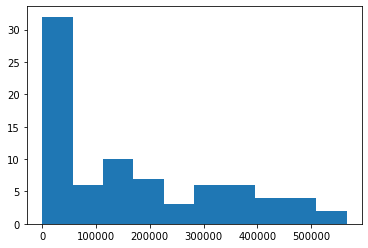

In [15]:
import matplotlib.pyplot as plt

plt.hist(df_total)
plt.show()

In [16]:
food_positive.iloc[:,[8,15]].groupby('Transported').count()

NameError: name 'food_positive' is not defined

### 저체온증 관련

선장이 식당을 제외한 모든 곳에서 난방과 온수 시스템을 끄라고 지시 -> FoodCourt 와 실종과의 관련성
[해당 링크](https://namu.wiki/w/%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89%ED%98%B8%20%EC%B9%A8%EB%AA%B0%20%EC%82%AC%EA%B3%A0)

In [21]:
df_ori = pd.read_csv('./kaggle/input/spaceship-titanic/train.csv')
df_ori

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [35]:
for i in range(14):
    print(f"### {i}세의 지불 내역###")
    df_ori[df_ori['Age']==i].iloc[:,7:12].sum()

### 0세의 지불 내역###


RoomService     0.0
FoodCourt       0.0
ShoppingMall    0.0
Spa             0.0
VRDeck          0.0
dtype: float64

### 1세의 지불 내역###


RoomService     0.0
FoodCourt       0.0
ShoppingMall    0.0
Spa             0.0
VRDeck          0.0
dtype: float64

### 2세의 지불 내역###


RoomService     0.0
FoodCourt       0.0
ShoppingMall    0.0
Spa             0.0
VRDeck          0.0
dtype: float64

### 3세의 지불 내역###


RoomService     0.0
FoodCourt       0.0
ShoppingMall    0.0
Spa             0.0
VRDeck          0.0
dtype: float64

### 4세의 지불 내역###


RoomService     0.0
FoodCourt       0.0
ShoppingMall    0.0
Spa             0.0
VRDeck          0.0
dtype: float64

### 5세의 지불 내역###


RoomService     0.0
FoodCourt       0.0
ShoppingMall    0.0
Spa             0.0
VRDeck          0.0
dtype: float64

### 6세의 지불 내역###


RoomService     0.0
FoodCourt       0.0
ShoppingMall    0.0
Spa             0.0
VRDeck          0.0
dtype: float64

### 7세의 지불 내역###


RoomService     0.0
FoodCourt       0.0
ShoppingMall    0.0
Spa             0.0
VRDeck          0.0
dtype: float64

### 8세의 지불 내역###


RoomService     0.0
FoodCourt       0.0
ShoppingMall    0.0
Spa             0.0
VRDeck          0.0
dtype: float64

### 9세의 지불 내역###


RoomService     0.0
FoodCourt       0.0
ShoppingMall    0.0
Spa             0.0
VRDeck          0.0
dtype: float64

### 10세의 지불 내역###


RoomService     0.0
FoodCourt       0.0
ShoppingMall    0.0
Spa             0.0
VRDeck          0.0
dtype: float64

### 11세의 지불 내역###


RoomService     0.0
FoodCourt       0.0
ShoppingMall    0.0
Spa             0.0
VRDeck          0.0
dtype: float64

### 12세의 지불 내역###


RoomService     0.0
FoodCourt       0.0
ShoppingMall    0.0
Spa             0.0
VRDeck          0.0
dtype: float64

### 13세의 지불 내역###


RoomService     48262.0
FoodCourt       21266.0
ShoppingMall    39158.0
Spa             19867.0
VRDeck          28705.0
dtype: float64

### 어린아이들 컬럼 ###
> 가설 : 나이가 어릴수록 Transported 성공 가능성이 많을 것이다.
- 나이가 어릴수록 Transported 실패 비율이 작다.
- 12세 이하의 아이들은 돈을 쓰지 않았다.
- 돈을 사용하지 않은 사람들의 Transported실패 비율이 낮다 